In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/saranpannasuriyaporn/male-female-height-and-weight")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/saranpannasuriyaporn/male-female-height-and-weight


100%|██████████| 20.3k/20.3k [00:00<00:00, 244kB/s]

In [5]:
data = pd.read_csv("male-female-height-and-weight/Test set.csv")
data.head(5)

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female


#### Data preprocess


In [6]:
data.loc[data['Sex']=='Male','Sex']=1
data.loc[data['Sex']=='Female','Sex']=0

In [7]:
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


In [8]:
X = data.drop(['Sex'], axis=1)
y = data['Sex']

In [9]:
X.head()

,Height,Weight
0,146.323241,59.861065
1,175.695412,77.863687
2,183.216164,72.131992
3,184.245269,77.546000
4,132.302261,55.188496


In [10]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled, columns=['Height', 'Weight'])

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  205 non-null    float64
 1   Weight  205 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [12]:
y[:5]


0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: object

In [13]:
y.dtype

dtype('O')

In [14]:
y = y.astype('int')

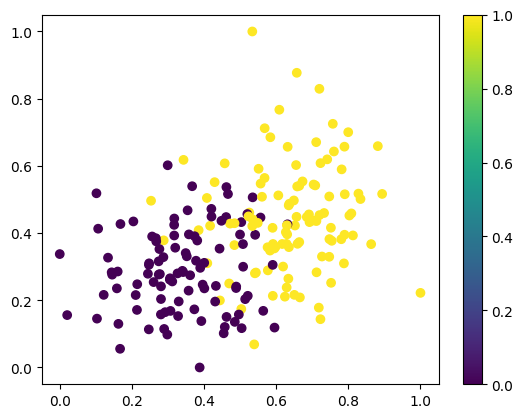

In [15]:
plt.scatter(X['Height'], X['Weight'], c=y)
plt.colorbar()
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
X_train.shape, X_test.shape

((164, 2), (41, 2))

#### Model Building

In [18]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics = ["accuracy"])

# train the model
epoch_number = 10
history = model.fit(X_train, y_train, epochs=epoch_number)

/Users/chamodyaavishka/anaconda3/envs/NEW/lib/python3.12/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5425 - loss: 0.6705  
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.7179 - loss: 0.6434
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.8170 - loss: 0.5671
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.8401 - loss: 0.4487
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.8149 - loss: 0.3798
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.8460 - loss: 0.3804
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.8561 - loss: 0.3225
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.8784 - loss: 0.3138
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.8443 - loss: 0.3725
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.8369 - loss: 0.4115


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,093 (113.65 KB)

 Trainable params: 9,697 (37.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,396 (75.77 KB)

In [20]:
y_pred = model.predict(X_test)
y_pred[:5]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[0.17589225],
       [0.9325084 ],
       [0.9709075 ],
       [0.16795793],
       [0.95522946]], dtype=float32)

In [21]:
y_test[:5]

15     0
9      1
100    1
132    0
68     1
Name: Sex, dtype: int64

#### Option 2


In [22]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# compile the model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics = ["accuracy"])

# train the model
epoch_number = 10
history = model.fit(X_train, y_train, epochs=epoch_number)

Epoch 1/10


/Users/chamodyaavishka/anaconda3/envs/NEW/lib/python3.12/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - accuracy: 0.5633 - loss: 0.6523
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.6836 - loss: 0.5397
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.7904 - loss: 0.4490
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 0.8230 - loss: 0.3573
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.8432 - loss: 0.4281
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.8646 - loss: 0.3066
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8732 - loss: 0.2872 
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.8436 - loss: 0.3334
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.8695 - loss: 0.3127
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.8986 - loss: 0.2732


In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,144 (113.85 KB)

 Trainable params: 9,714 (37.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,430 (75.90 KB)

In [24]:
y_pred = model.predict(X_test)
y_pred[:5]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[0.8868718 , 0.11312825],
       [0.04538684, 0.9546132 ],
       [0.0214113 , 0.97858864],
       [0.8298942 , 0.17010586],
       [0.08275049, 0.9172495 ]], dtype=float32)

In [25]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred[:5]

array([0, 1, 1, 0, 1])

In [26]:
y_test[:5]

15     0
9      1
100    1
132    0
68     1
Name: Sex, dtype: int64

#### Evaluvate Model

In [27]:
# Using evaluate method
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9408 - loss: 0.2461 


[0.25958049297332764, 0.9268292784690857]

In [28]:
# Precision
precision = tf.keras.metrics.Precision()
precision.update_state(y_test, y_pred)
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.9047619>

In [29]:
# Recall
recall = tf.keras.metrics.Recall()
recall.update_state(y_test, y_pred)
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.95>

<Axes: >

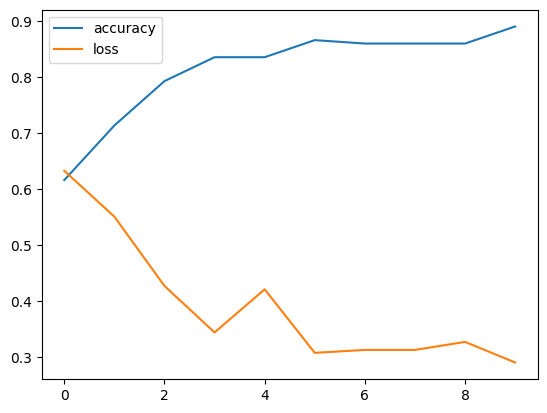

In [30]:
pd.DataFrame(history.history).plot()